# Symmetric molecules analysis summary
- There are 401 fully symmetric molesules
- logP is bigger among symmetric molecules on the average

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from scipy import stats
from rdkit.Chem import AllChem

DATA_PATH = "../data/3_final_data/"

In [2]:
data = pd.read_csv(DATA_PATH + "logp_wo_averaging.csv")

In [3]:
data

,smiles,logP
0,BrC(Br)(Br)Br,3.42
1,BrC1C2CC3C(C2)C13,3.11
2,BrC1CC2CCC1C2,3.54
3,BrC1CCCCC1,3.20
4,BrC=C(Br)Br,3.20
...,...,...
13772,c1ncncn1,-0.73
13773,c1nn[nH]n1,-0.60
13774,c1nnn(C23CC4CC(CC(C4)C2)C3)n1,2.95
13775,c1nnnn1C12CC3CC(CC(C3)C1)C2,2.95


In [4]:
mols = [Chem.MolFromSmiles(s) for s in data.smiles]

In [5]:
canon_list = [list(Chem.CanonicalRankAtoms(mol, breakTies=False)) for mol in mols]

In [6]:
set_list = [pd.Series(Chem.CanonicalRankAtoms(mol, breakTies=False)).value_counts() for mol in mols]

In [7]:
values_list = [pd.Series(Chem.CanonicalRankAtoms(mol, breakTies=False)).value_counts() for mol in mols]

In [8]:
symmetry_list = [len(values) == len(values[values % 2 == 0]) for values in values_list]

In [9]:
symmetry_data = data[symmetry_list]

In [10]:
not_symmetry_data = data[[not e for e in symmetry_list]]

In [11]:
symmetry_data

,smiles,logP
8,BrCCCCCCCCCCBr,6.12
12,Brc1c(Br)c(Br)c(Br)c(Br)c1Br,6.07
13,Brc1cc(Br)c(-c2c(Br)cc(Br)cc2Br)c(Br)c1,6.39
14,Brc1cc(Br)c(Br)c(-c2c(Br)c(Br)cc(Br)c2Br)c1Br,5.50
15,Brc1cc(Br)c(Br)cc1Br,5.13
...,...,...
13746,c1cnc2c(c1)ccc1cccnc12,1.78
13748,c1cnc2ccc3ncccc3c2c1,2.05
13758,c1cnccn1,-0.26
13765,c1csc(-c2cccs2)c1,3.75


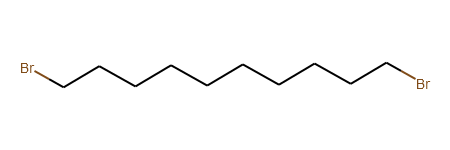

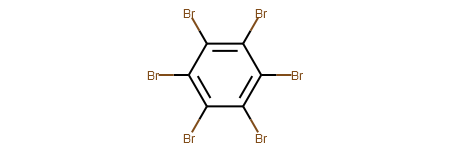

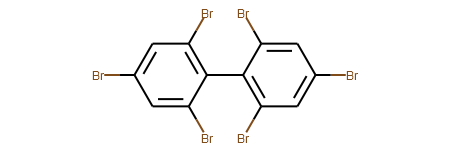

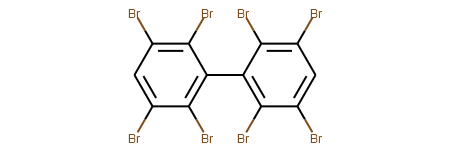

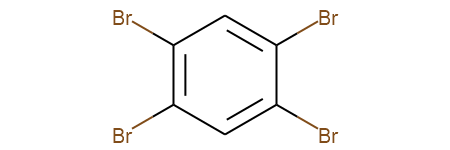

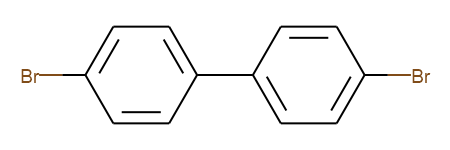

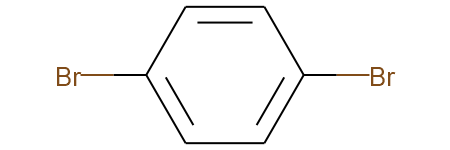

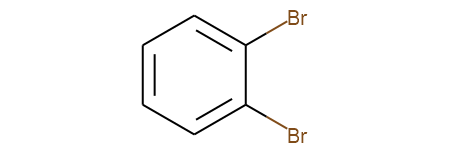

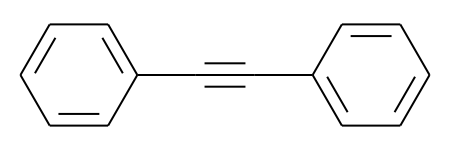

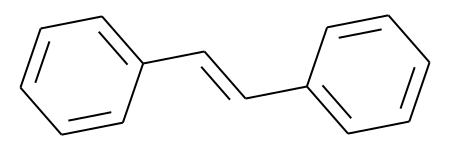

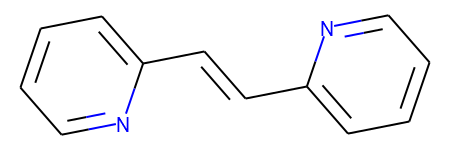

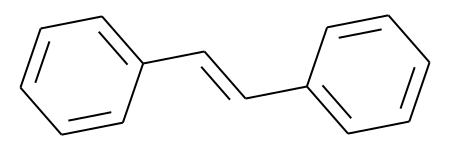

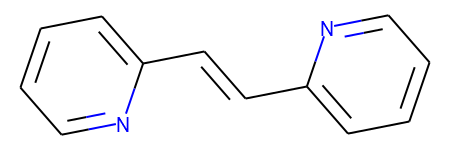

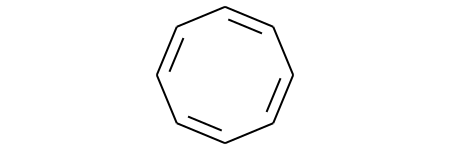

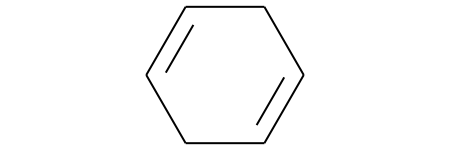

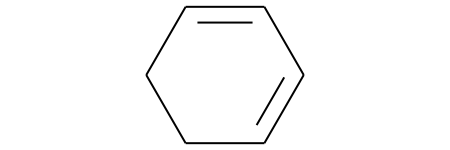

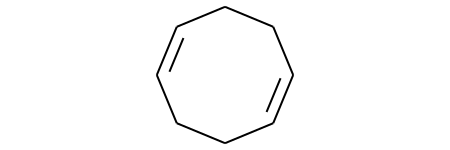

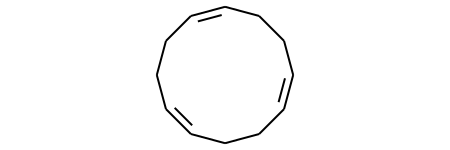

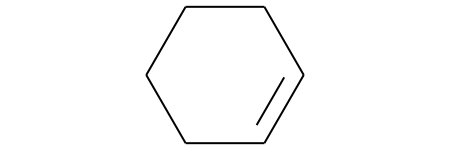

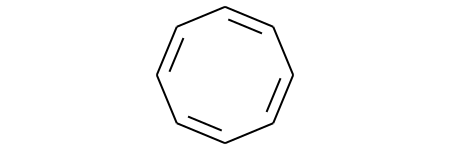

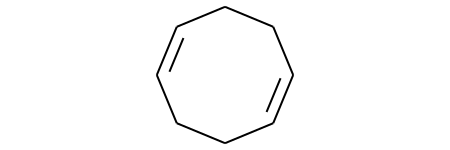

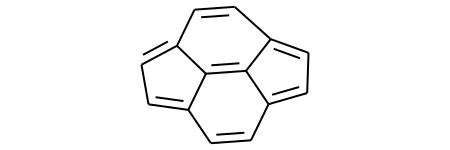

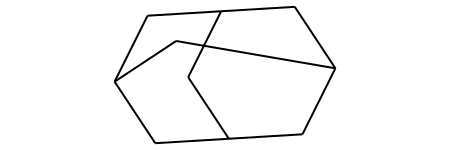

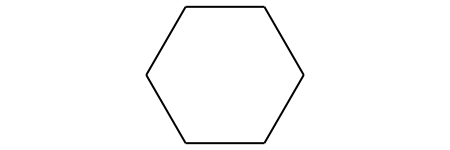

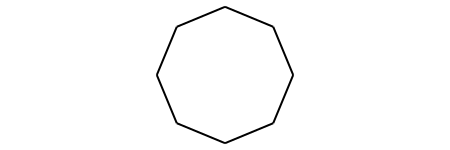

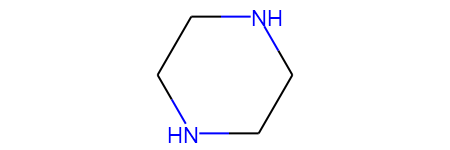

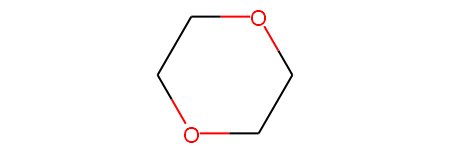

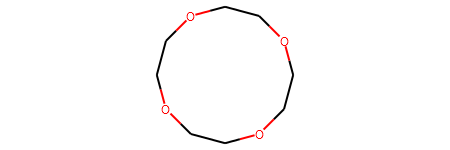

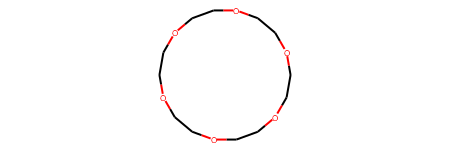

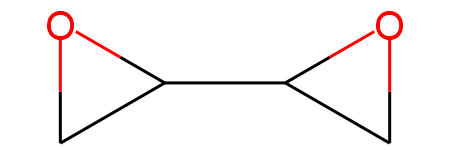

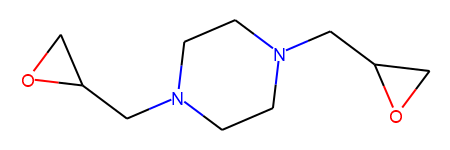

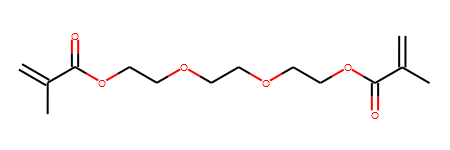

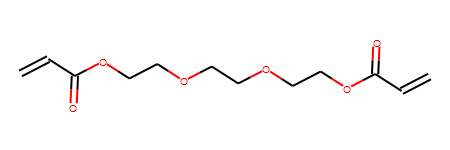

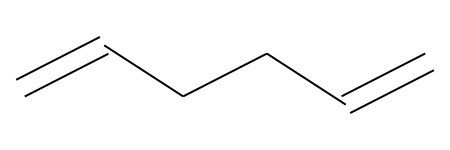

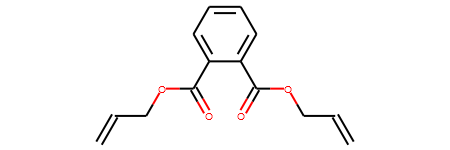

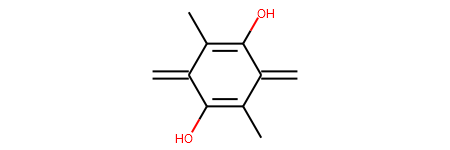

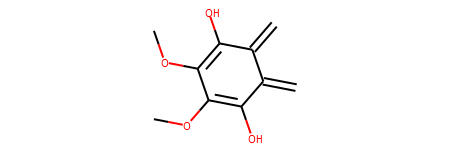

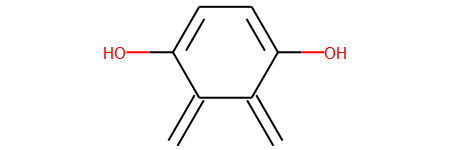

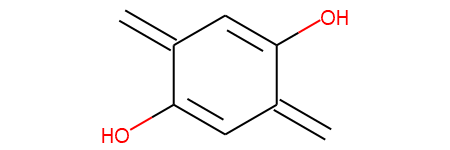

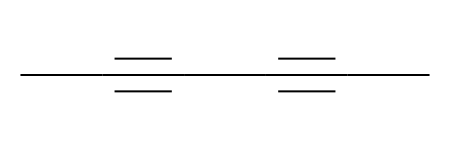

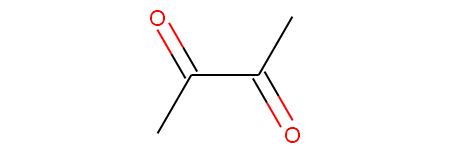

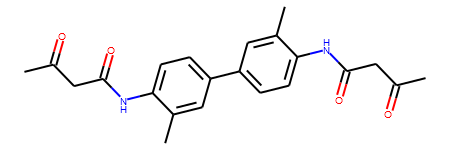

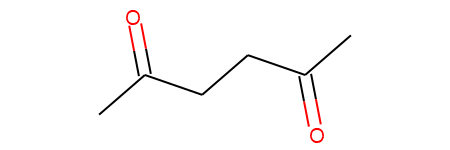

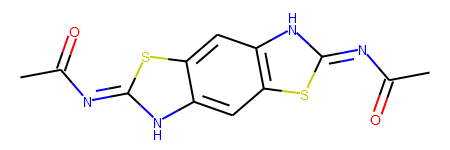

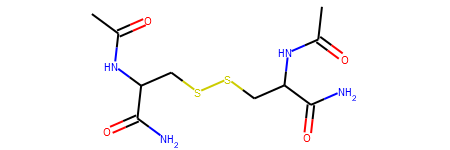

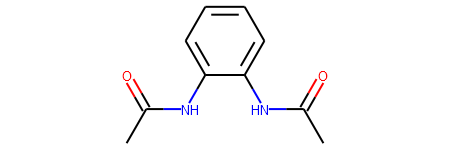

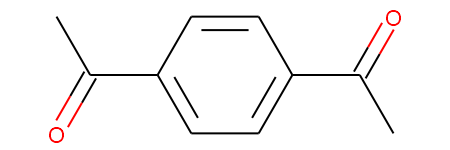

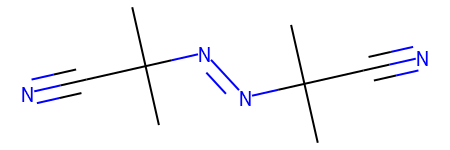

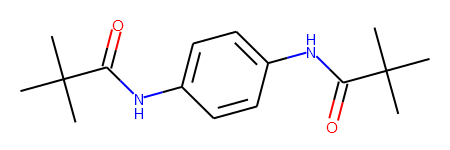

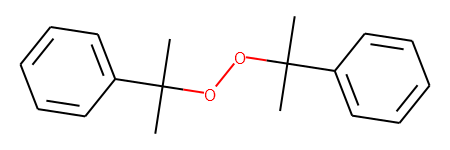

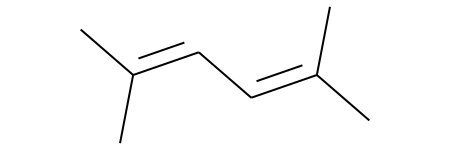

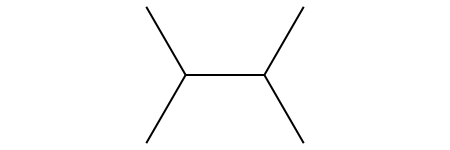

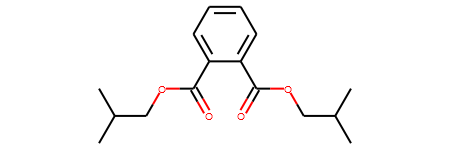

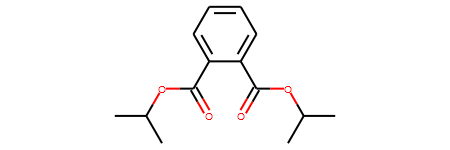

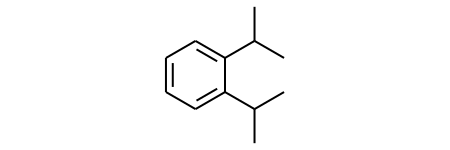

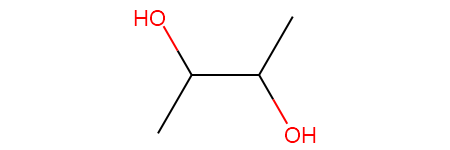

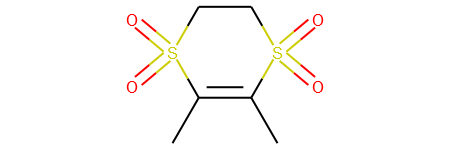

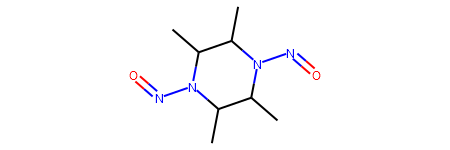

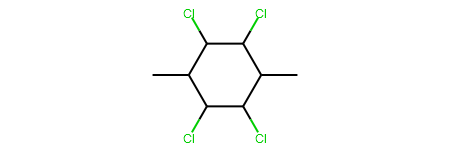

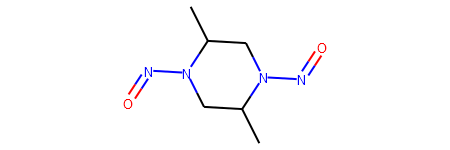

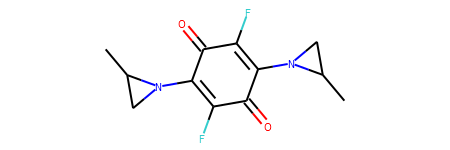

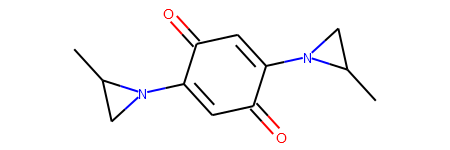

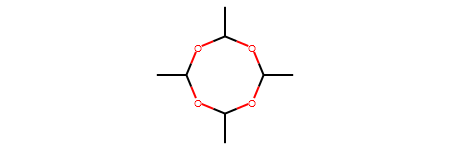

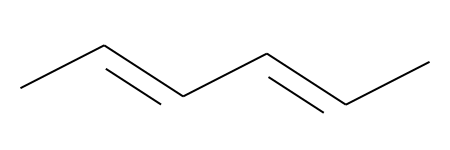

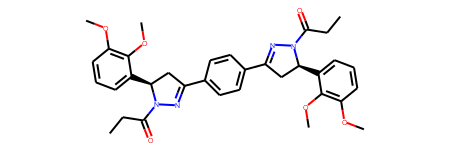

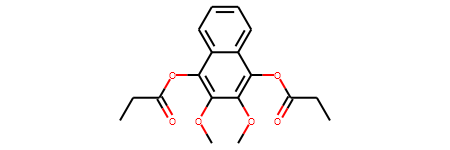

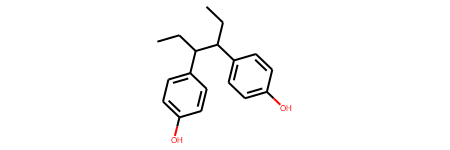

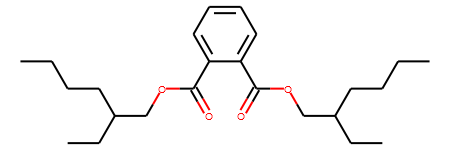

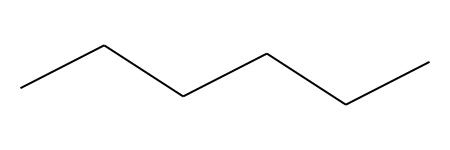

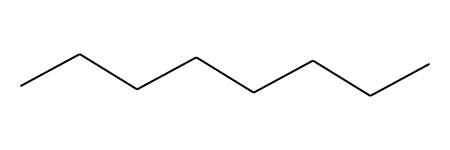

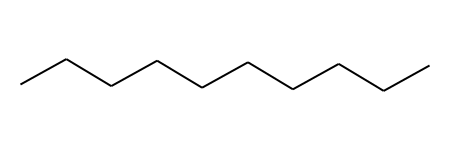

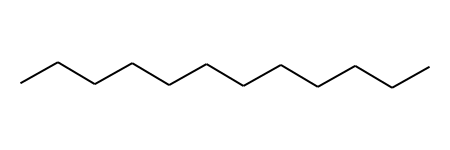

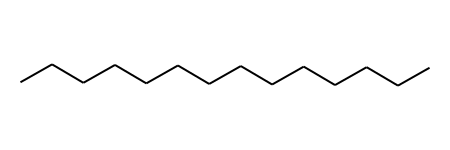

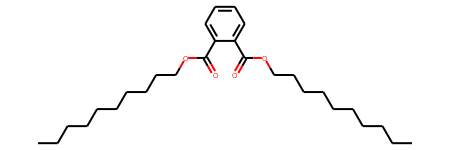

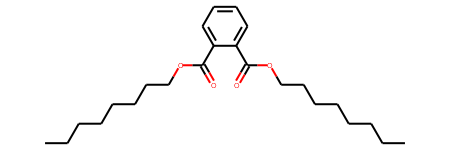

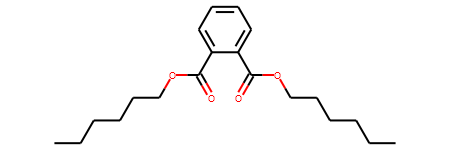

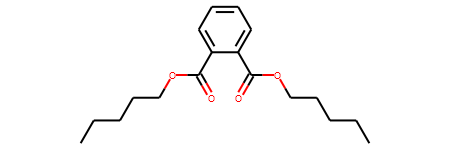

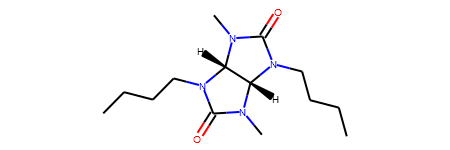

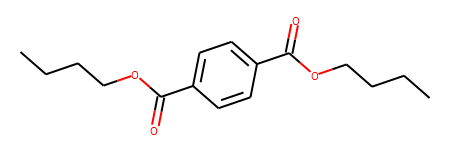

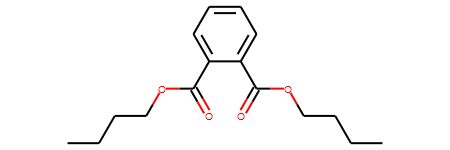

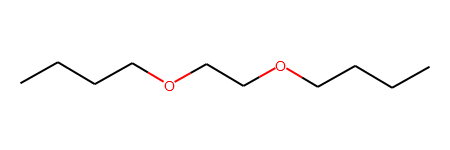

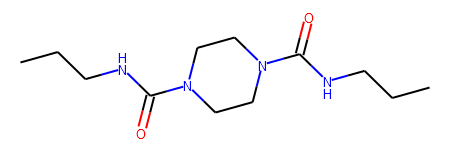

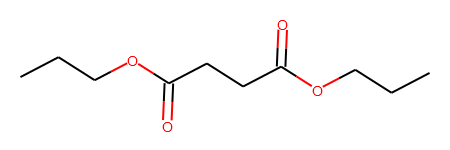

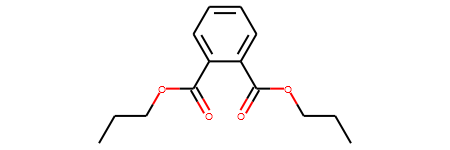

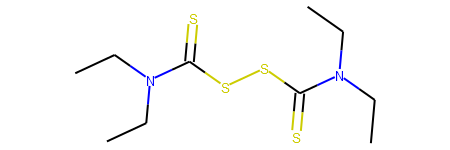

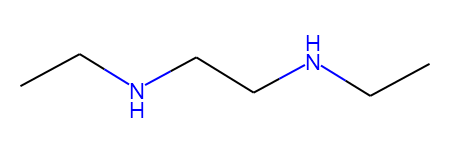

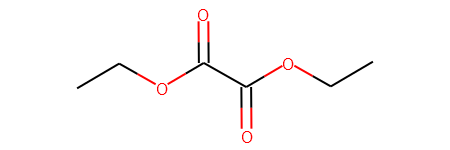

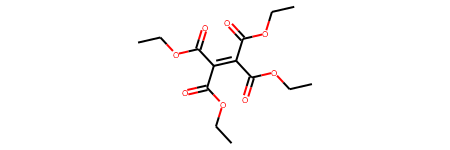

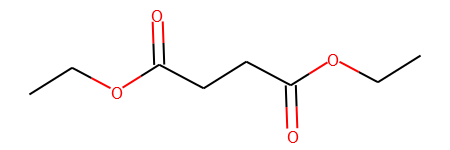

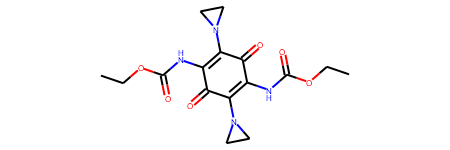

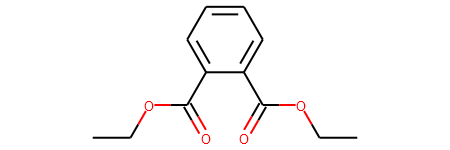

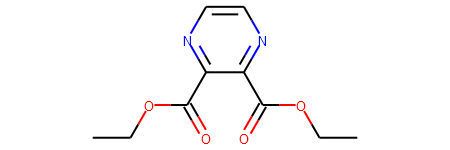

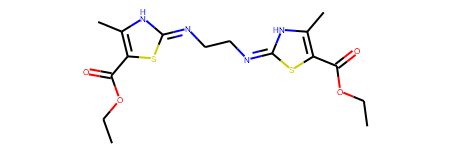

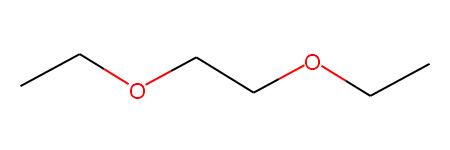

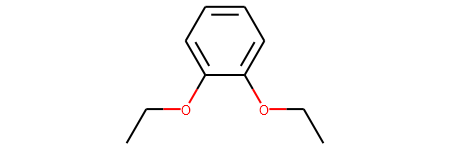

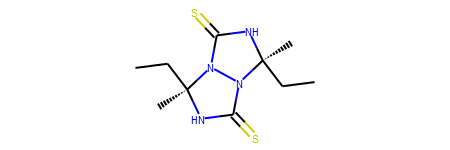

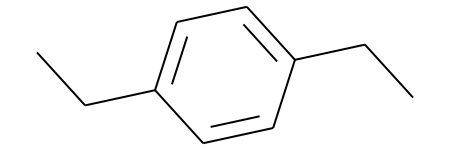

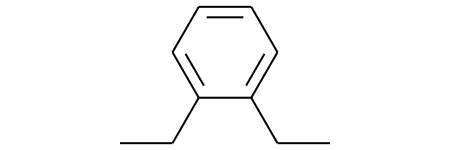

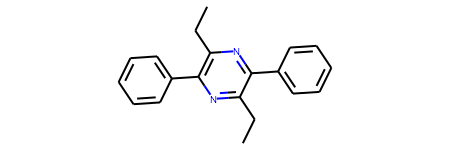

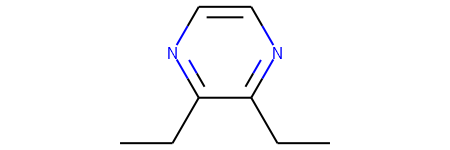

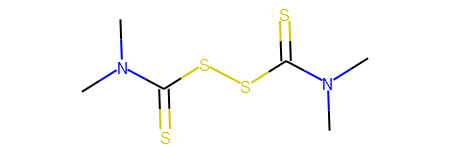

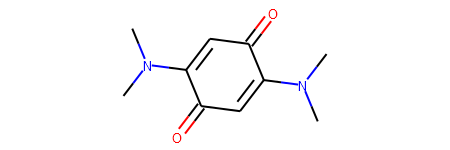

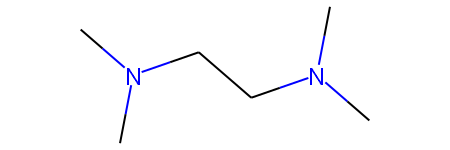

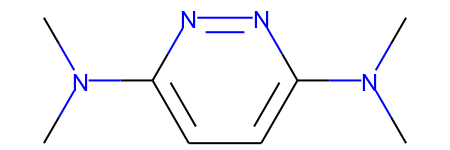

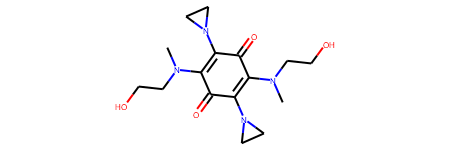

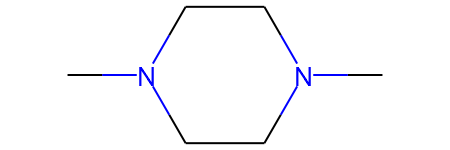

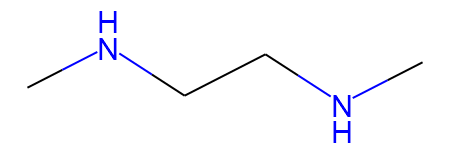

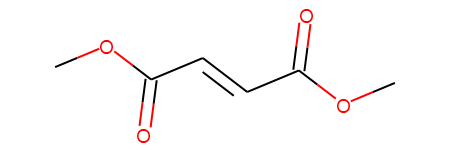

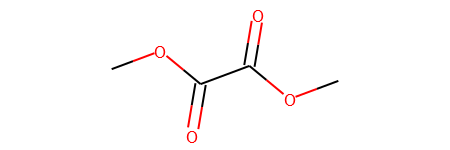

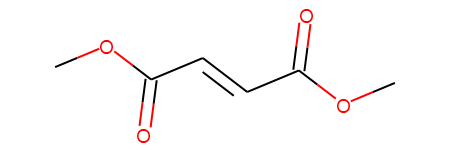

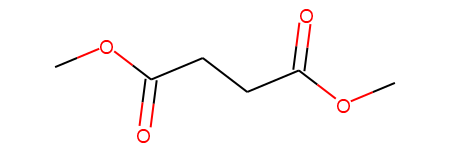

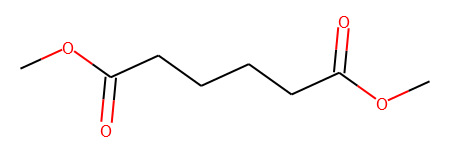

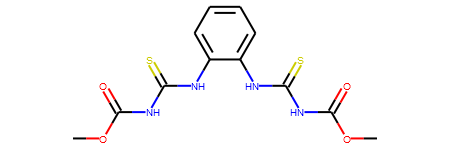

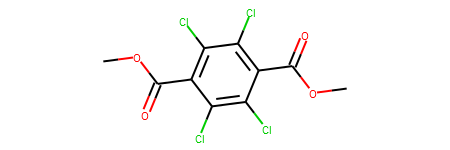

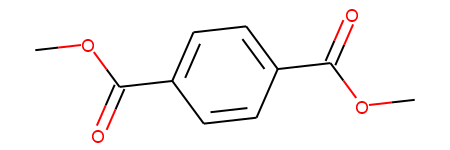

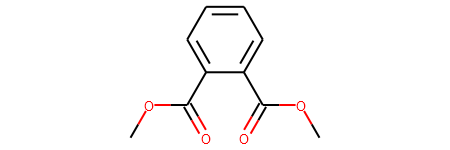

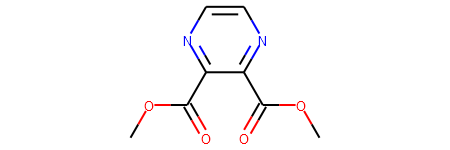

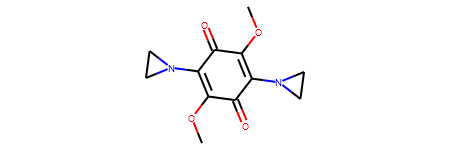

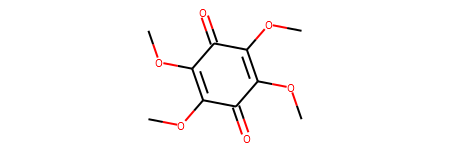

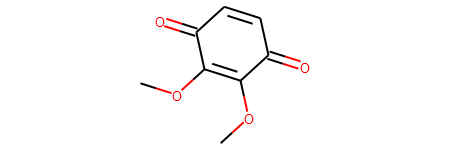

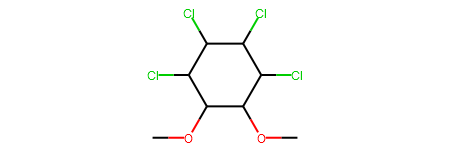

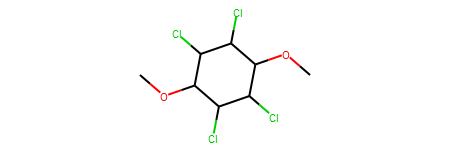

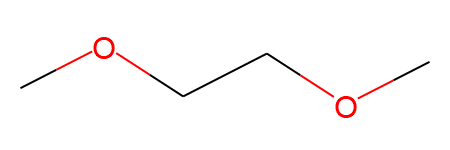

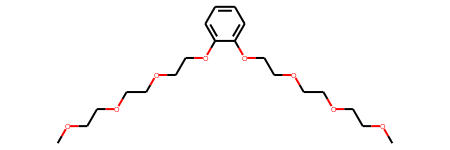

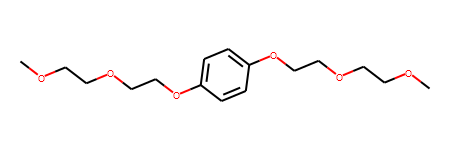

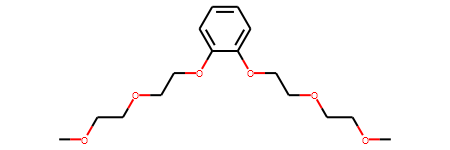

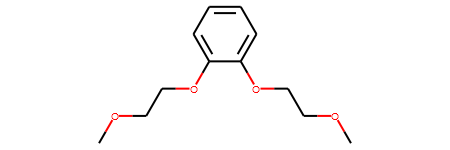

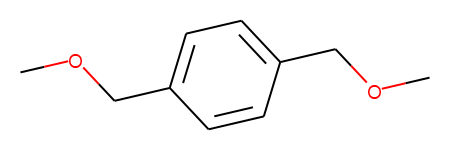

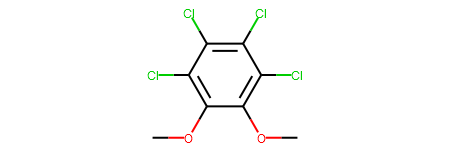

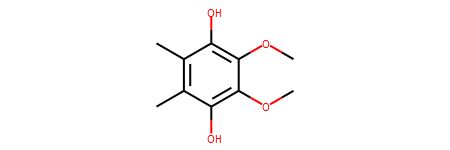

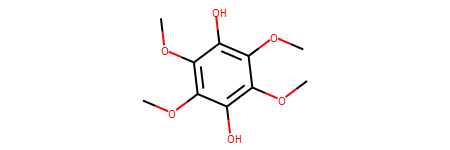

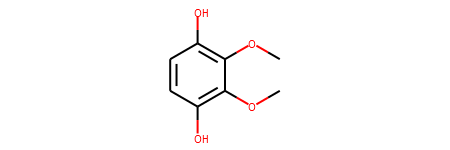

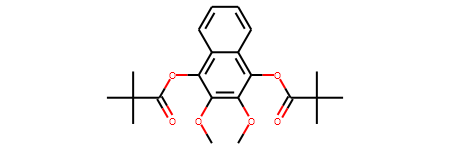

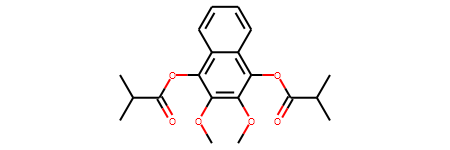

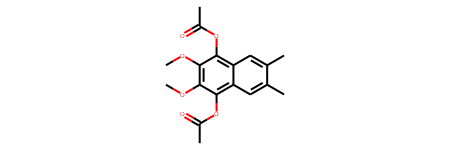

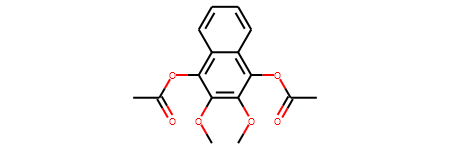

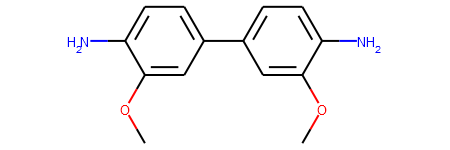

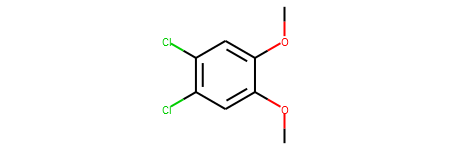

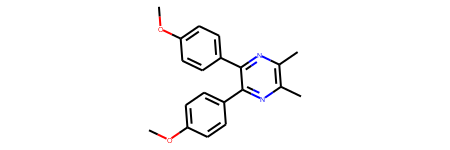

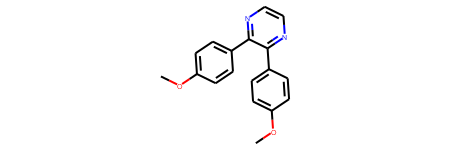

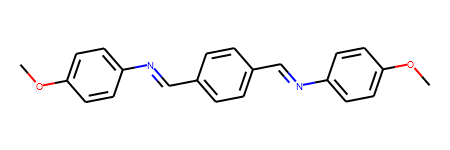

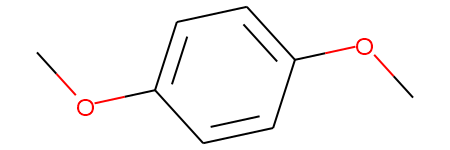

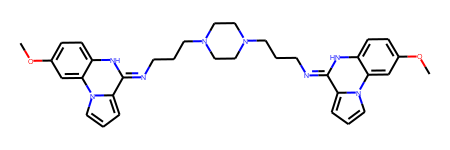

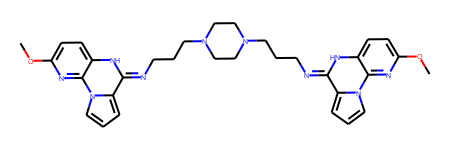

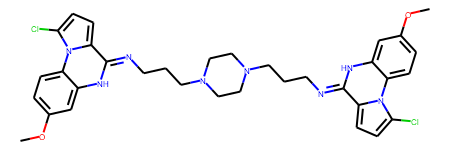

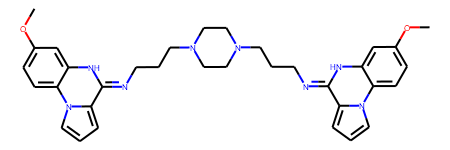

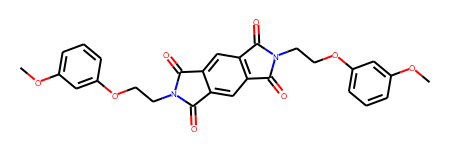

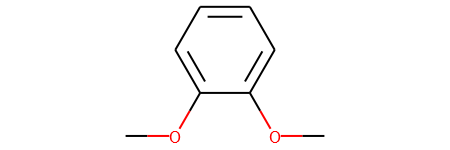

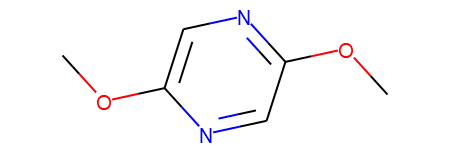

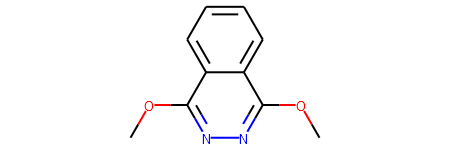

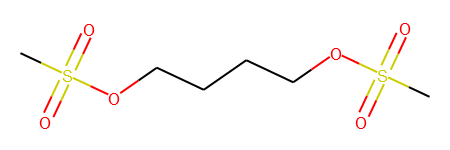

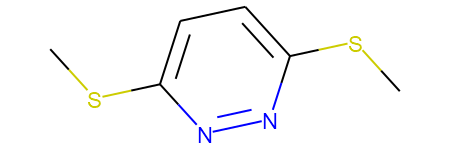

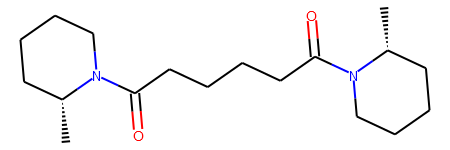

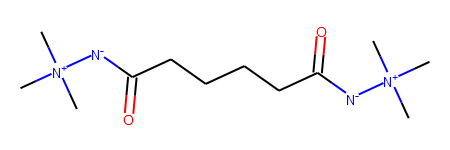

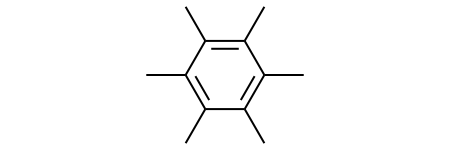

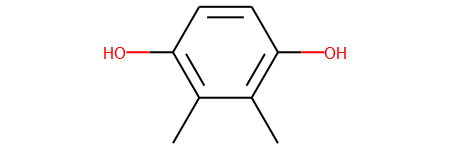

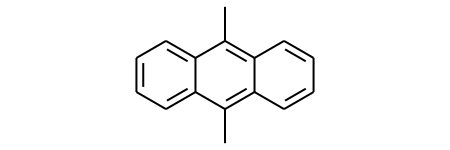

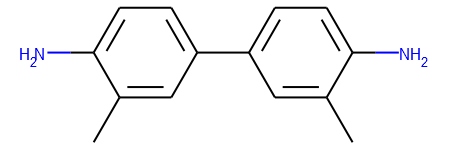

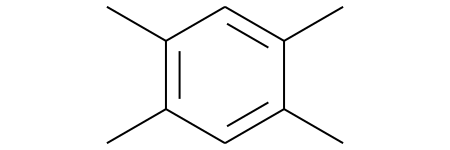

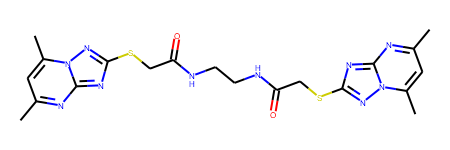

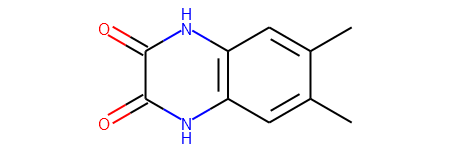

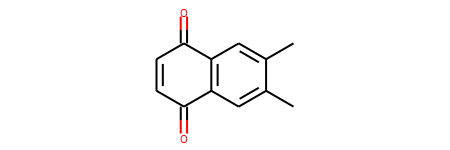

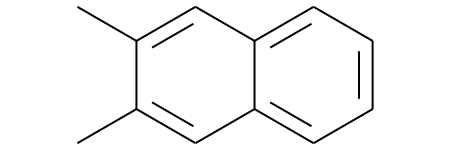

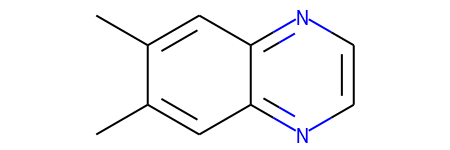

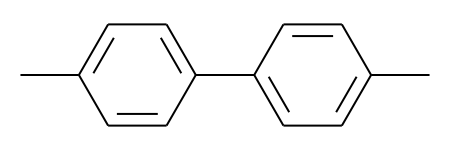

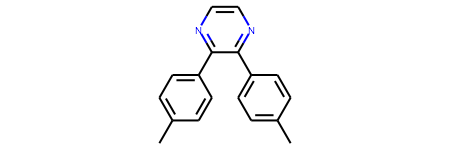

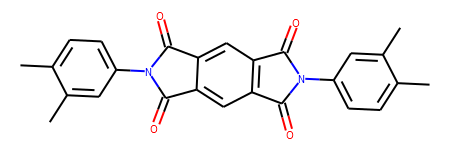

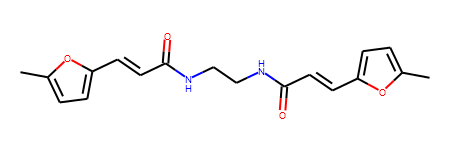

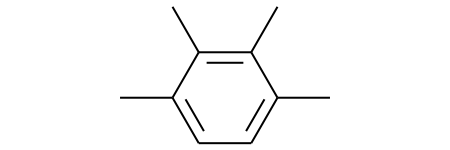

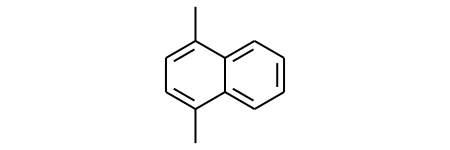

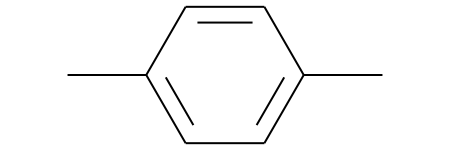

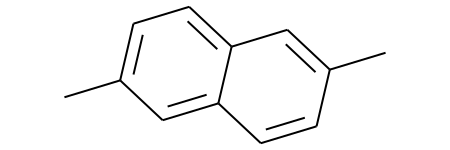

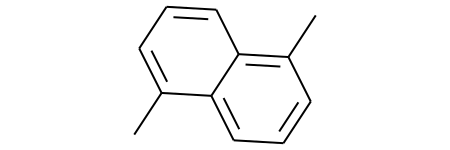

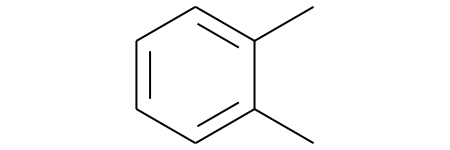

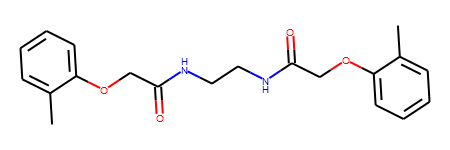

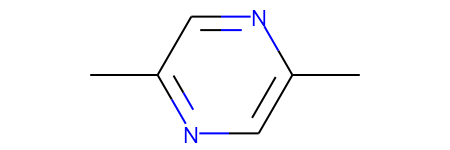

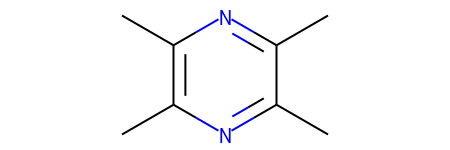

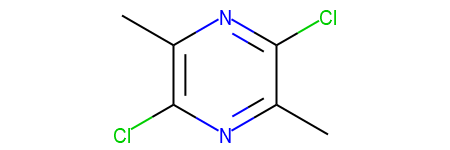

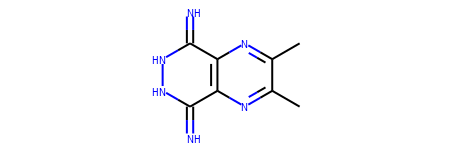

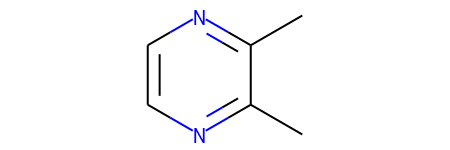

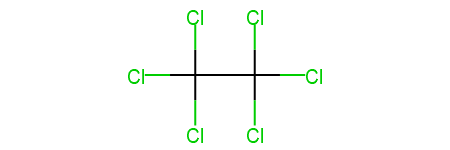

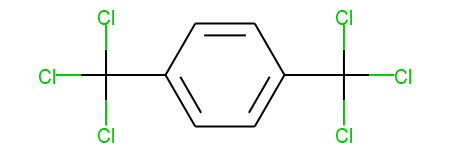

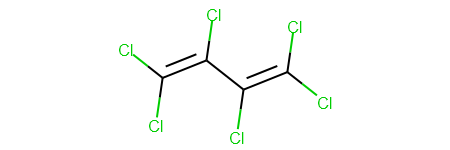

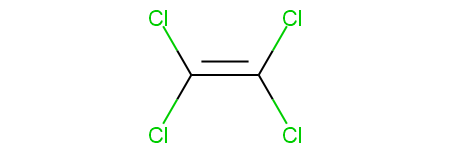

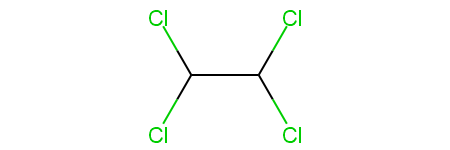

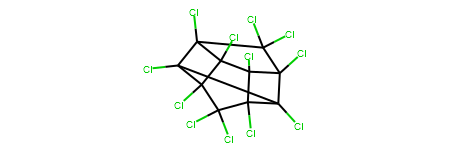

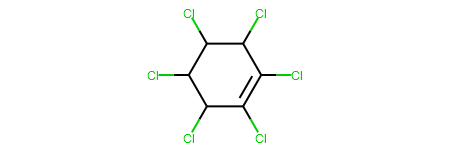

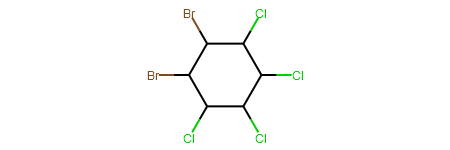

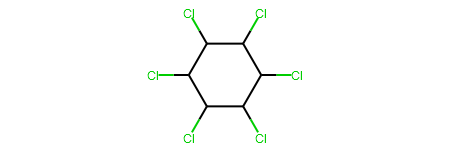

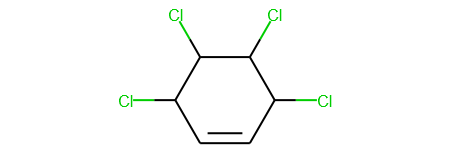

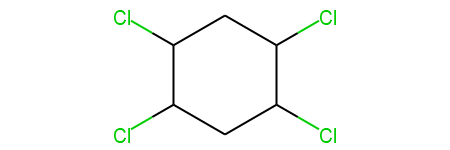

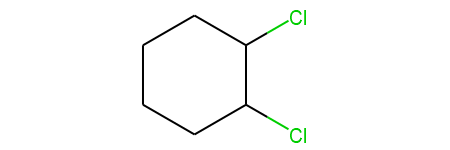

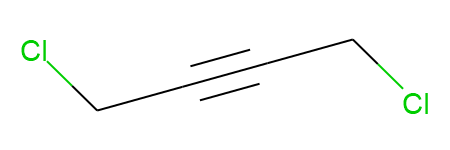

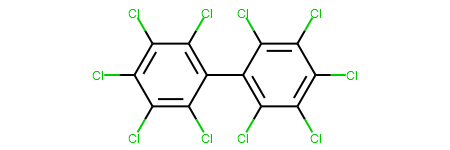

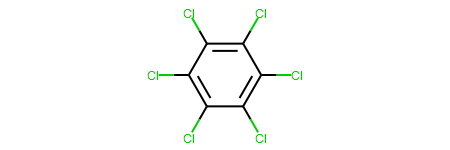

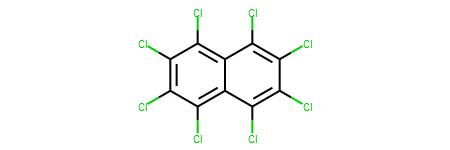

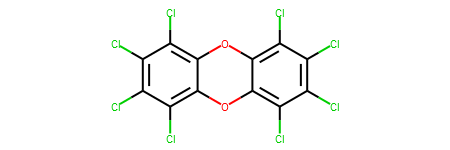

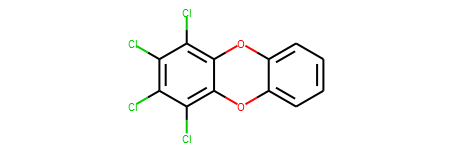

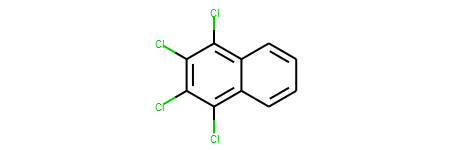

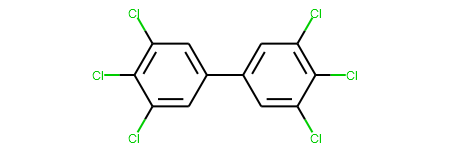

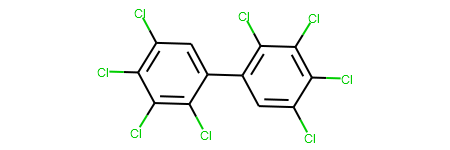

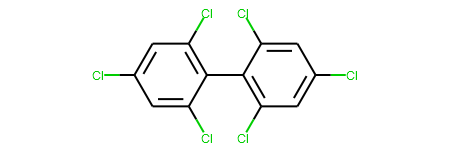

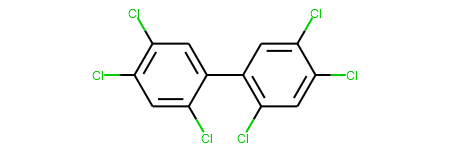

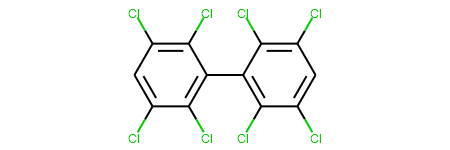

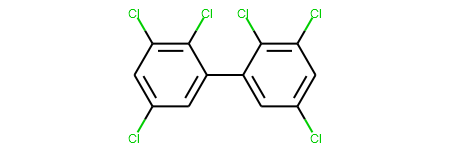

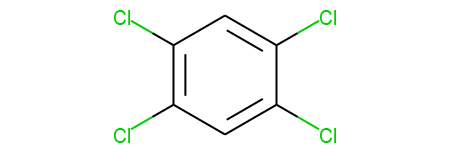

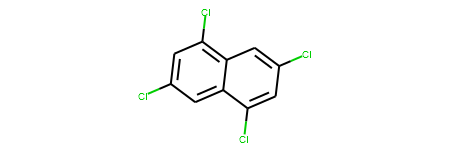

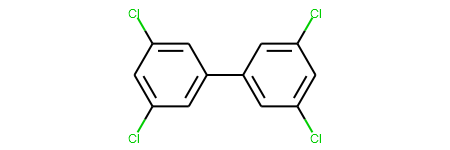

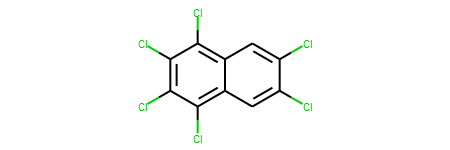

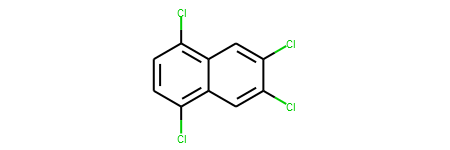

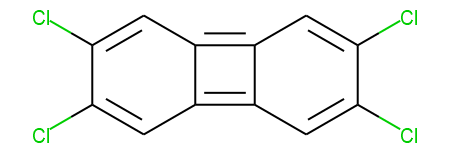

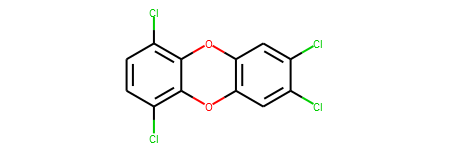

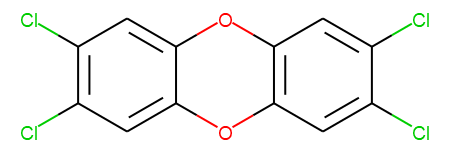

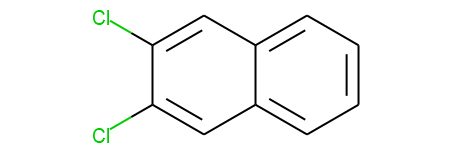

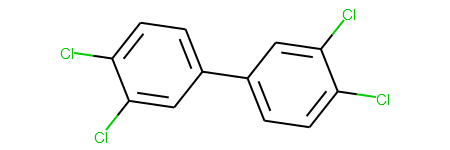

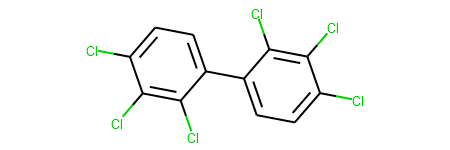

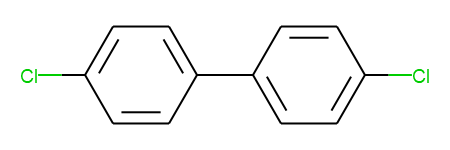

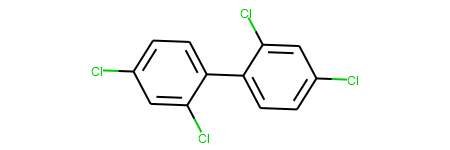

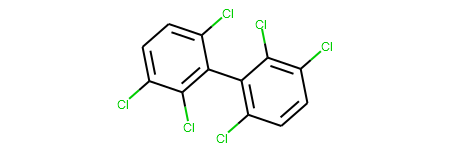

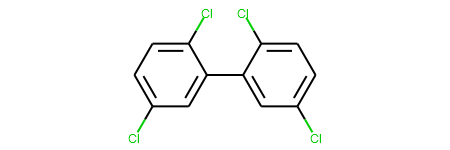

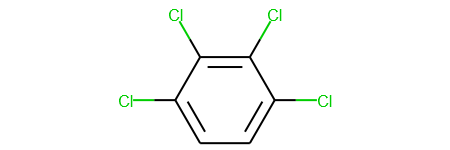

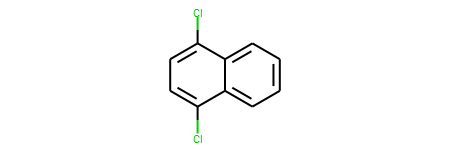

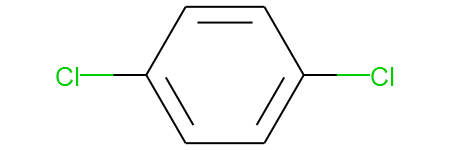

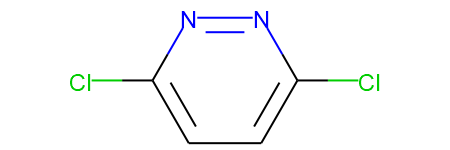

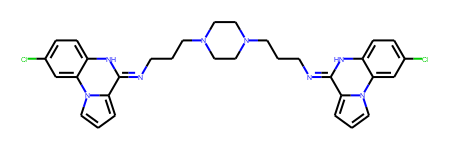

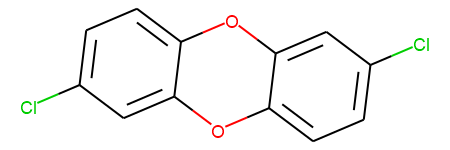

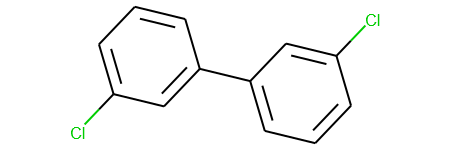

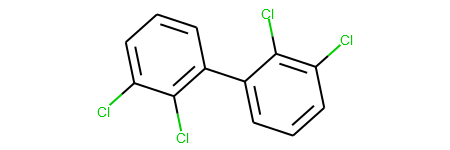

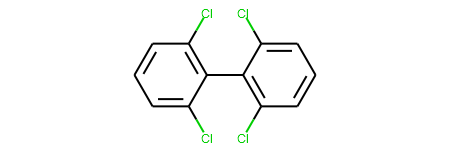

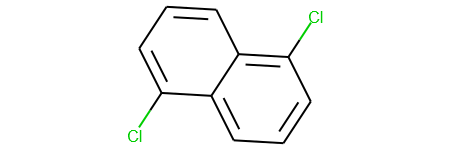

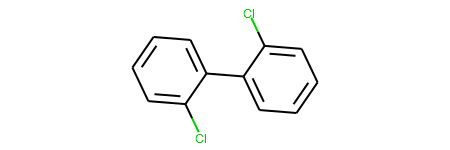

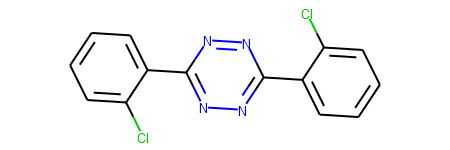

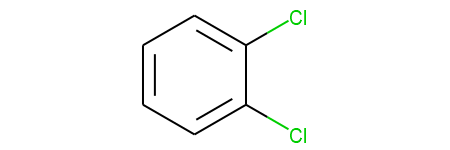

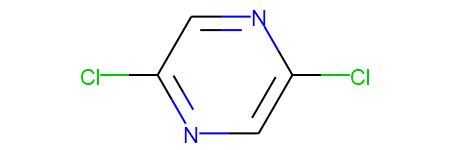

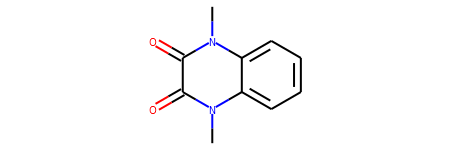

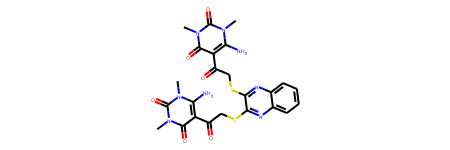

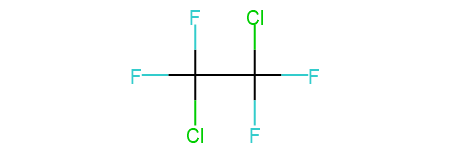

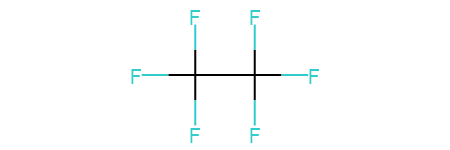

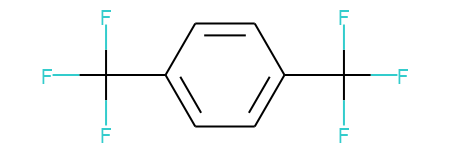

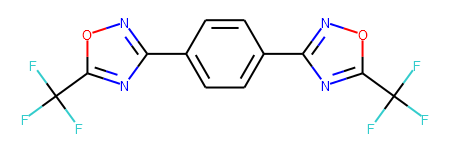

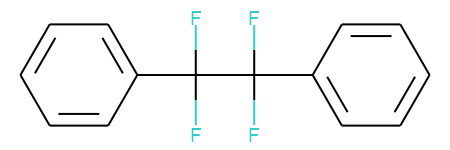

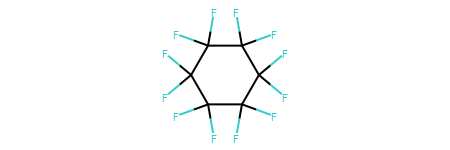

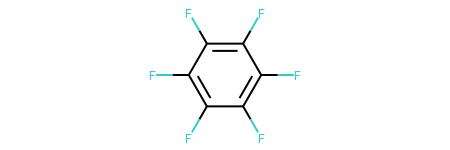

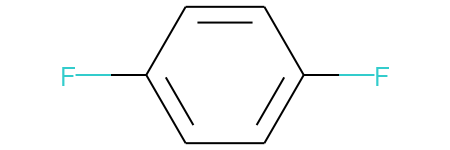

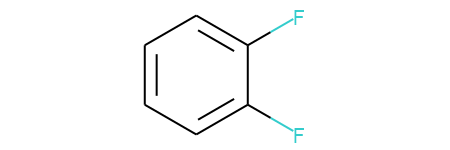

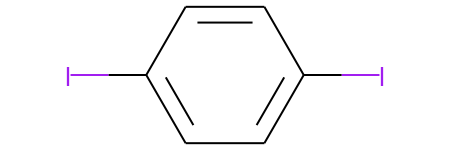

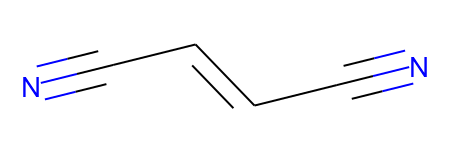

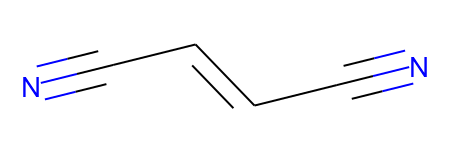

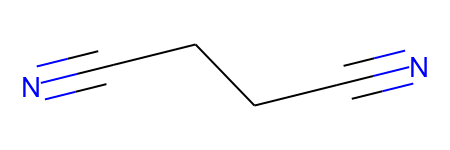

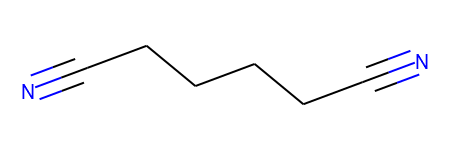

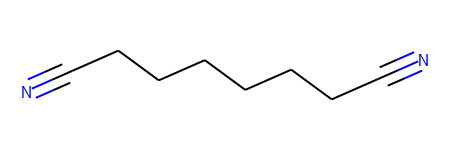

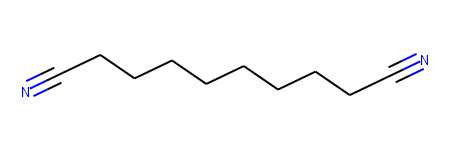

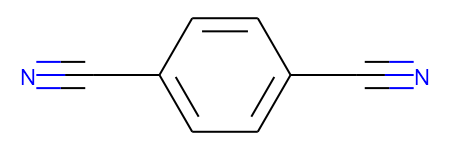

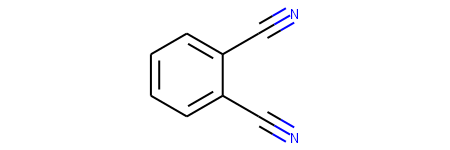

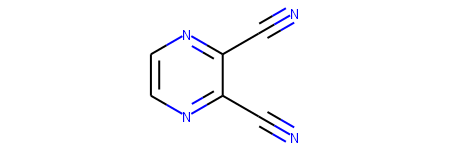

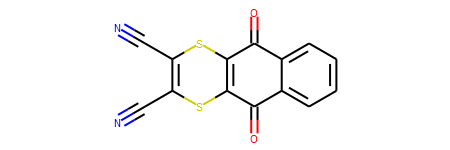

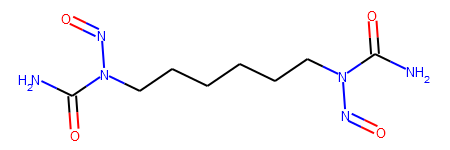

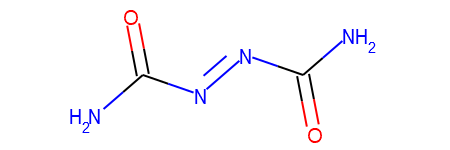

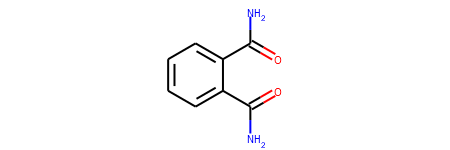

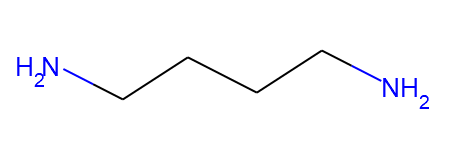

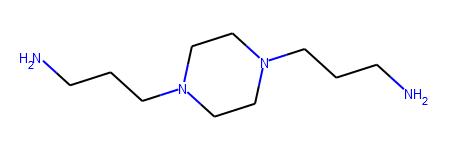

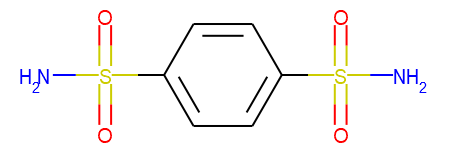

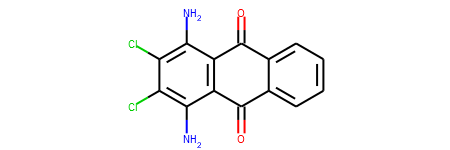

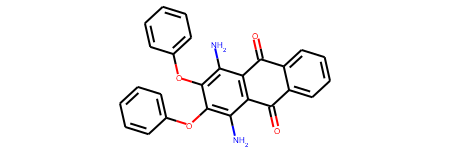

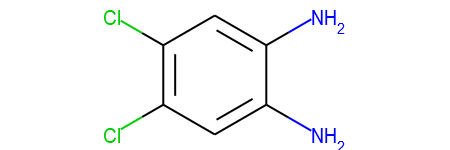

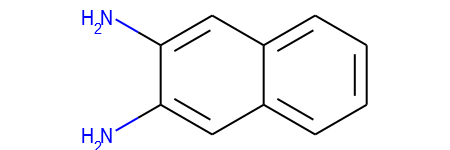

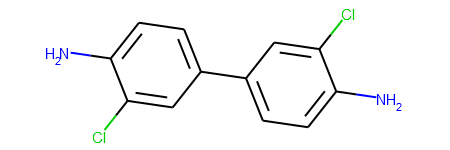

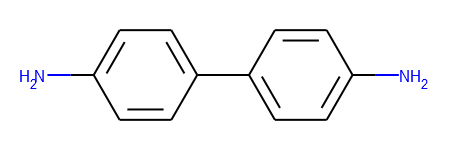

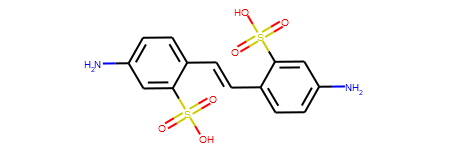

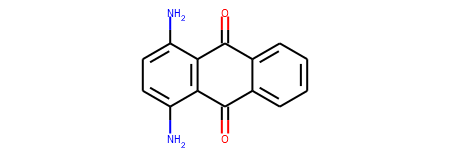

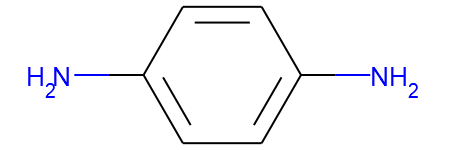

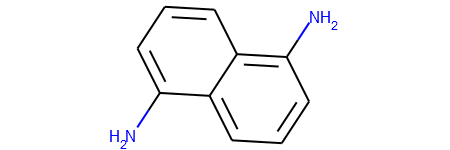

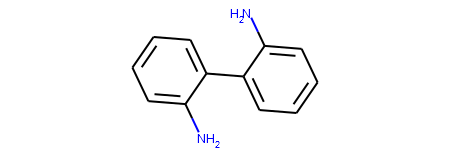

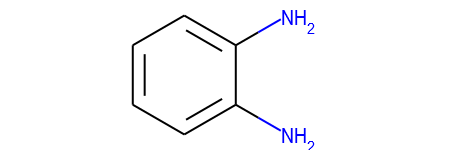

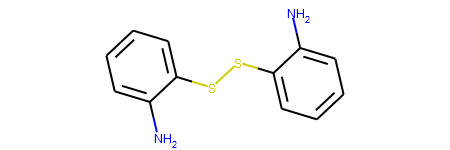

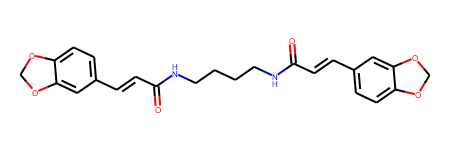

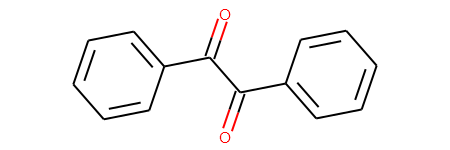

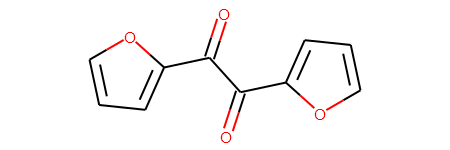

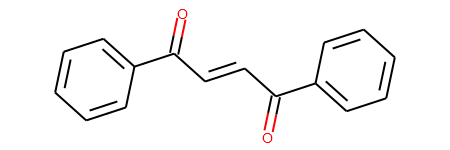

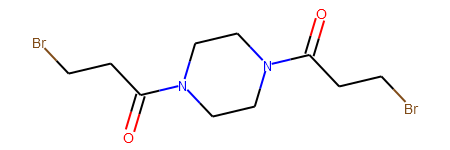

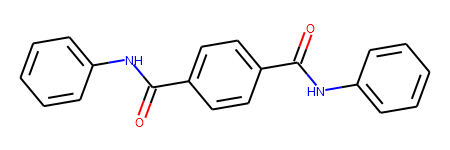

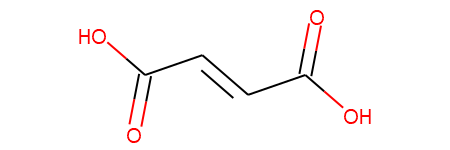

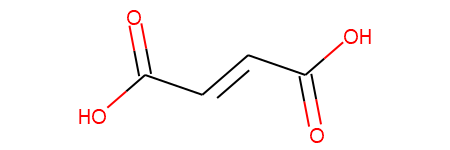

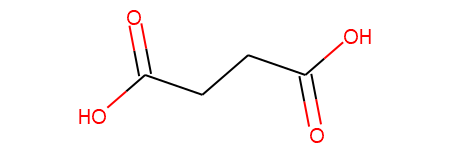

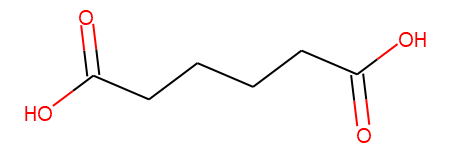

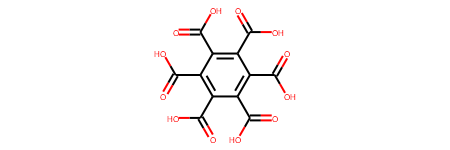

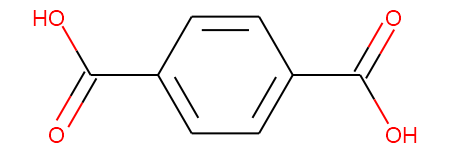

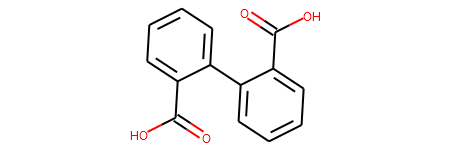

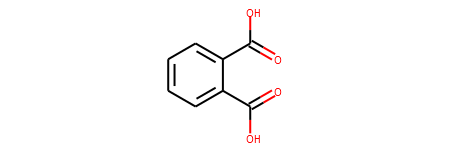

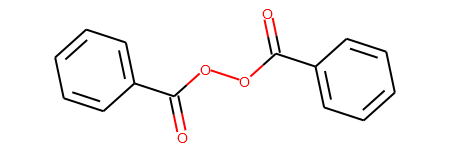

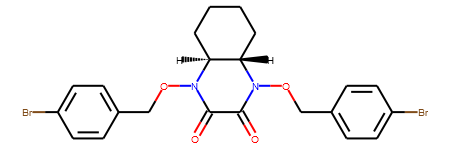

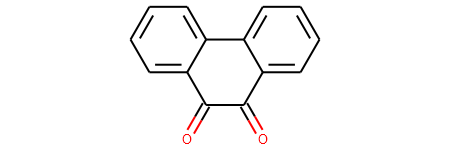

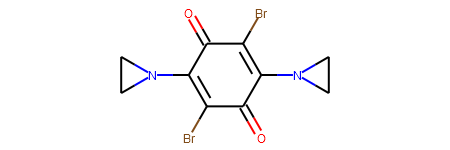

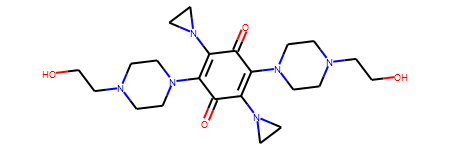

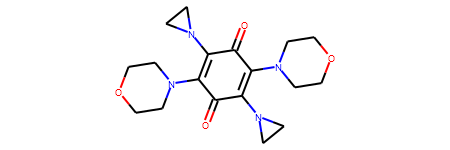

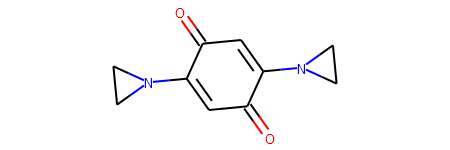

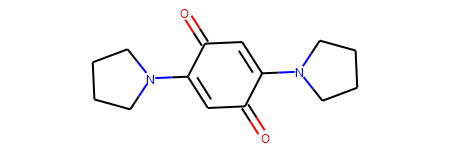

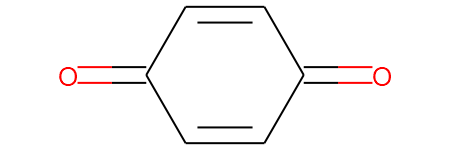

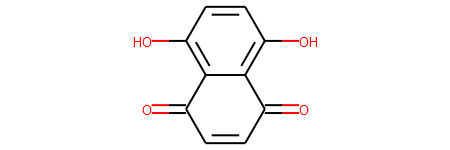

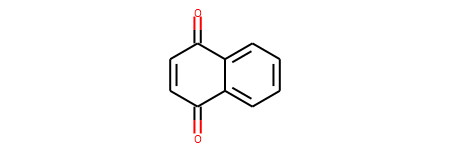

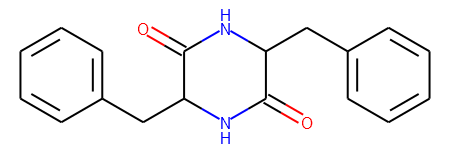

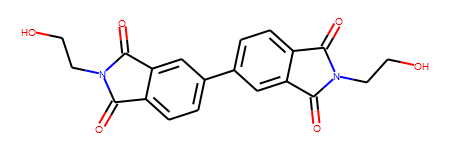

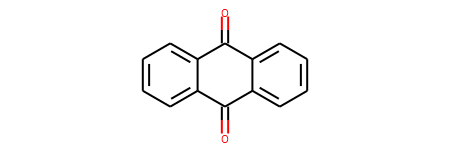

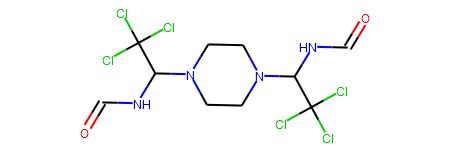

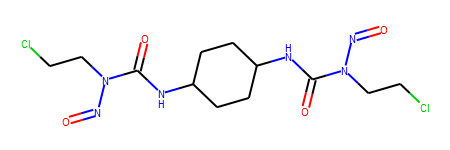

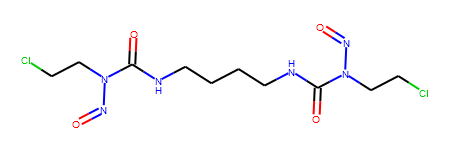

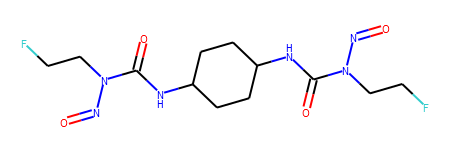

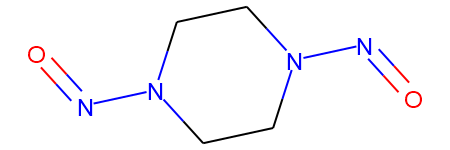

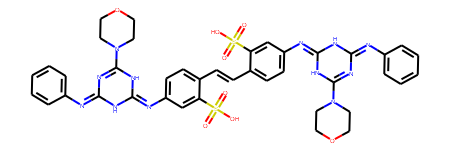

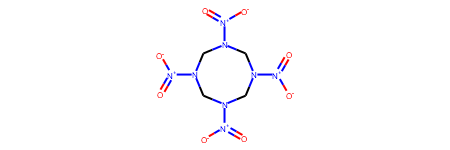

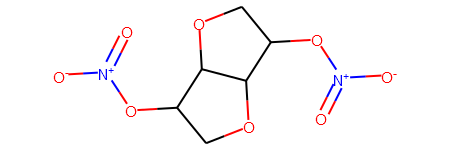

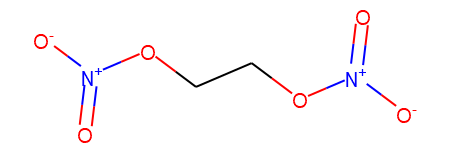

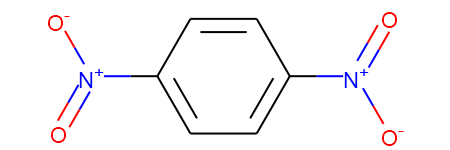

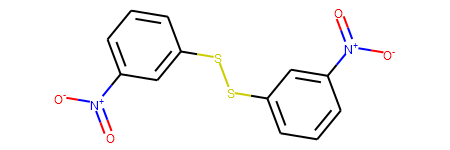

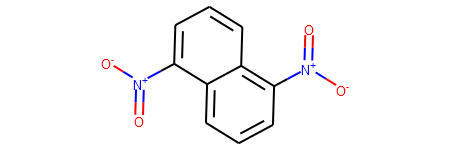

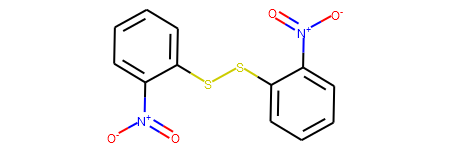

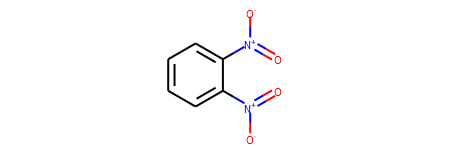

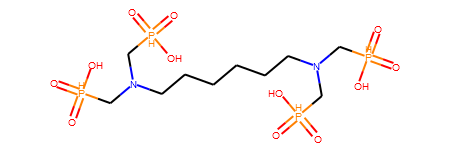

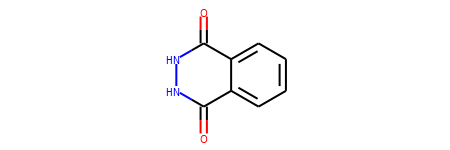

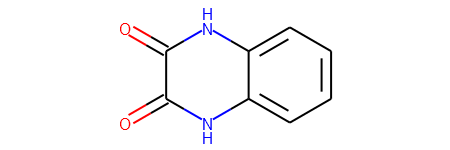

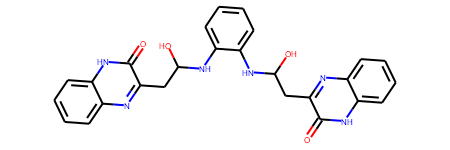

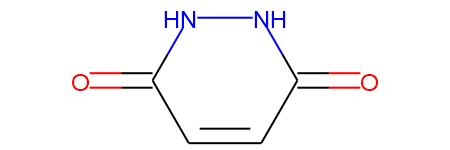

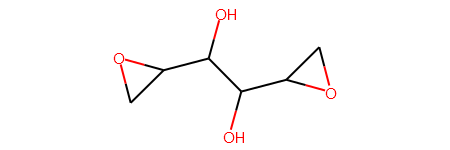

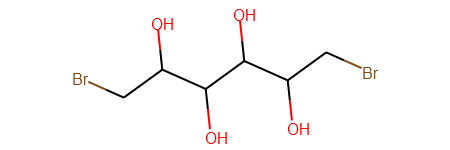

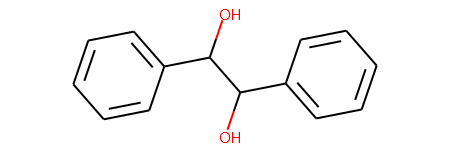

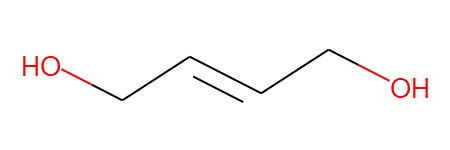

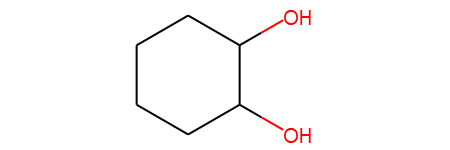

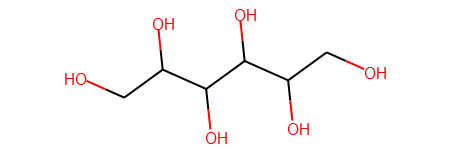

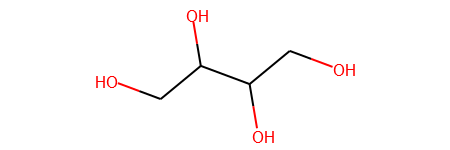

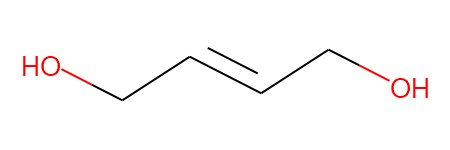

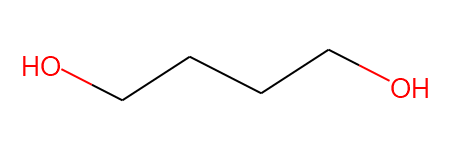

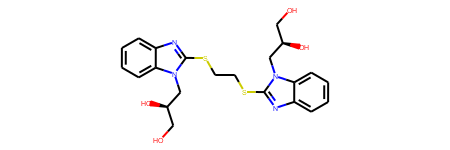

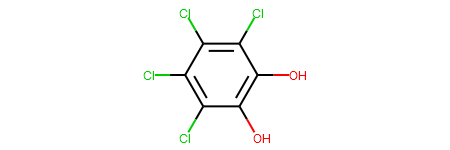

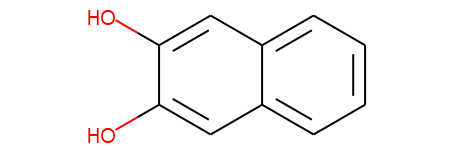

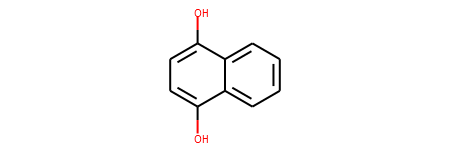

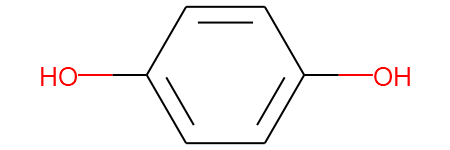

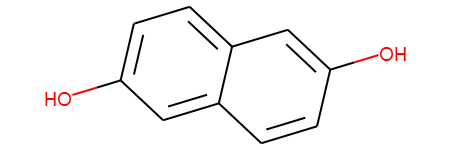

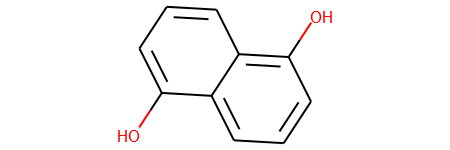

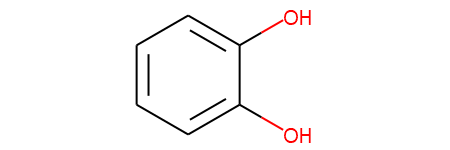

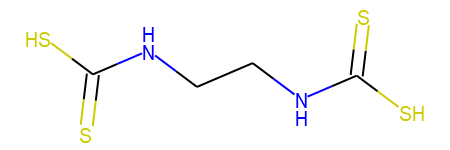

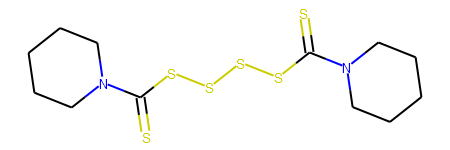

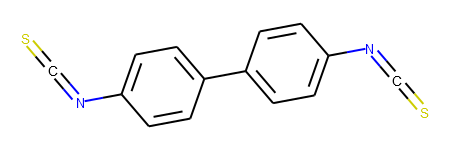

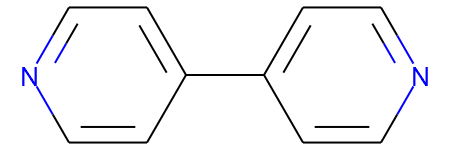

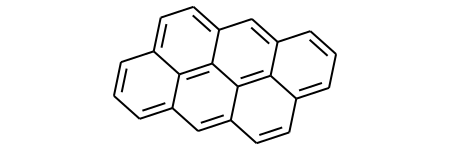

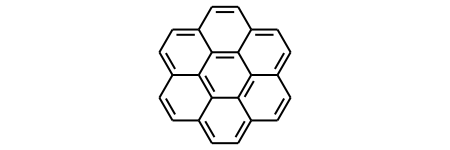

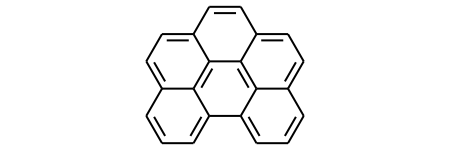

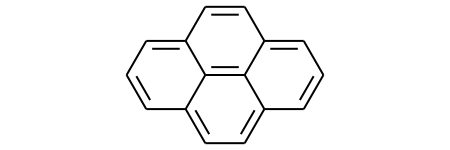

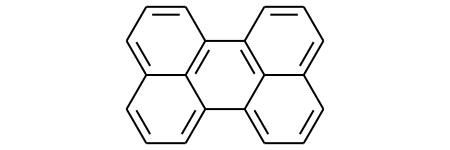

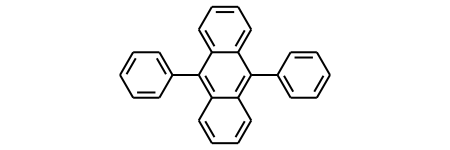

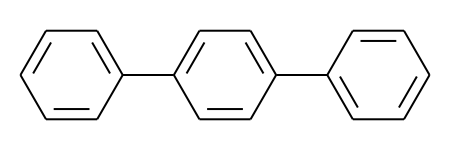

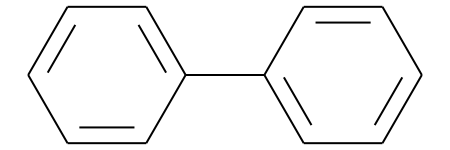

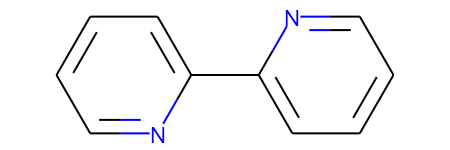

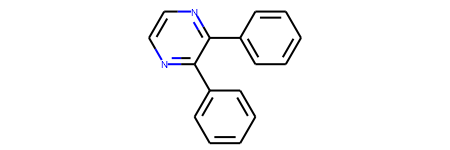

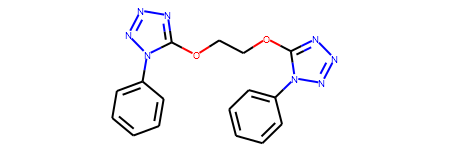

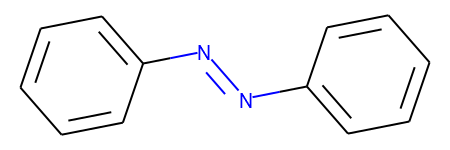

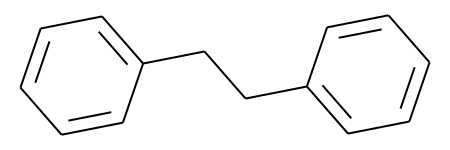

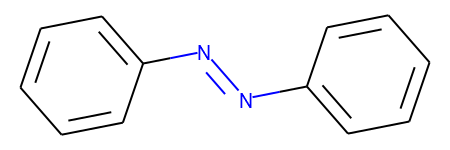

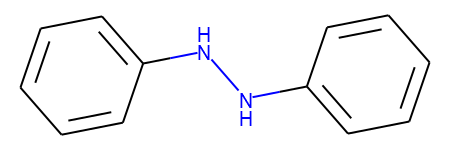

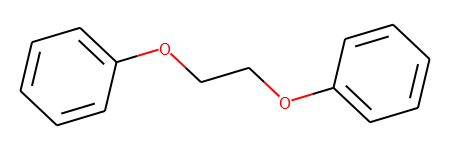

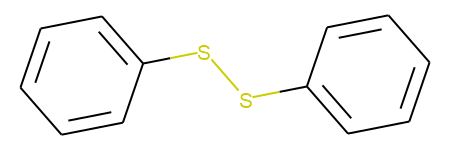

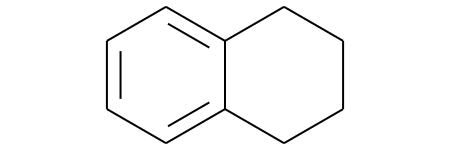

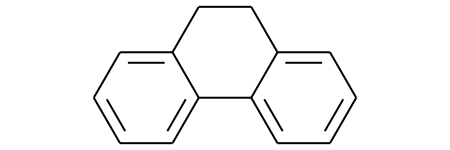

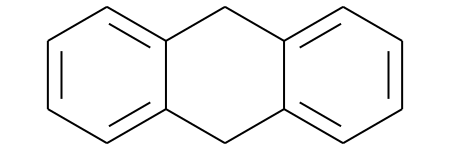

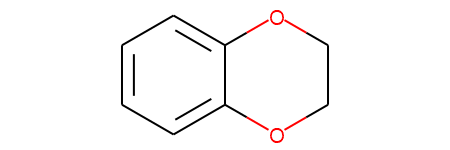

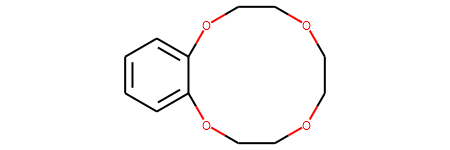

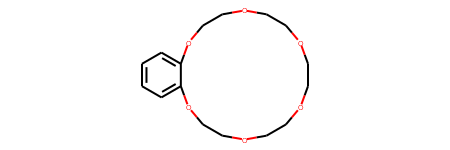

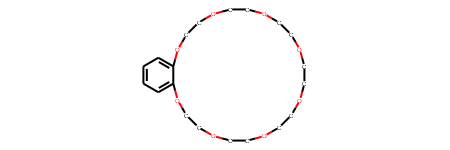

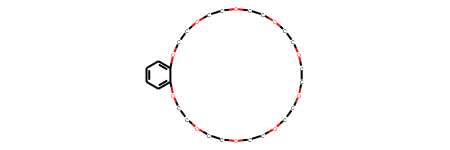

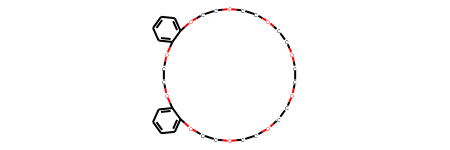

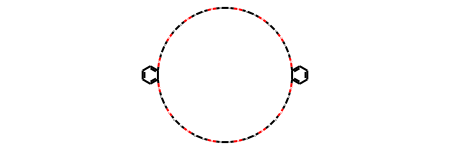

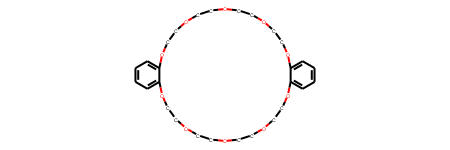

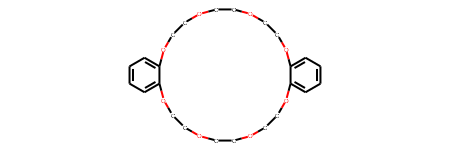

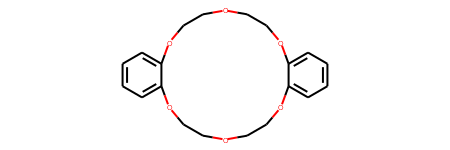

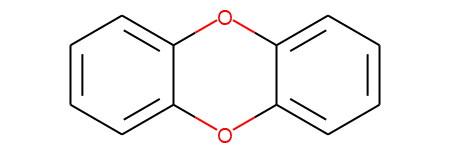

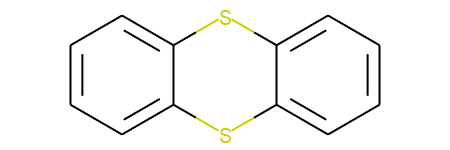

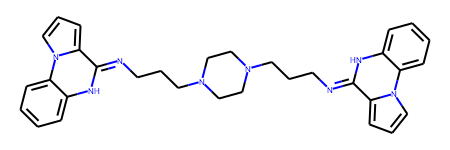

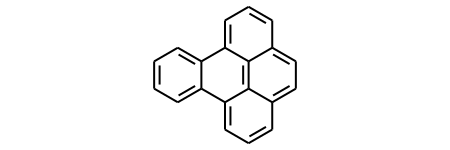

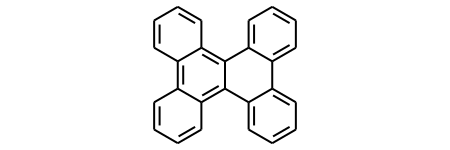

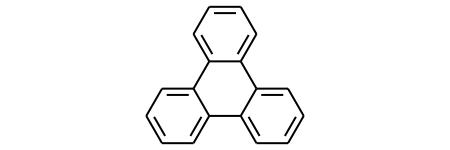

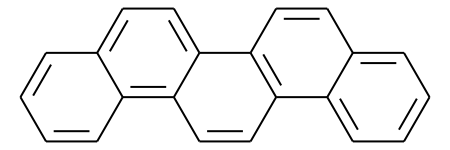

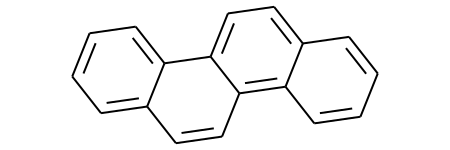

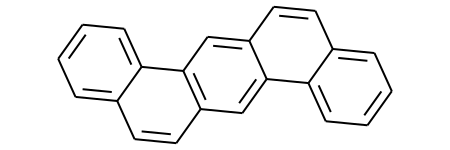

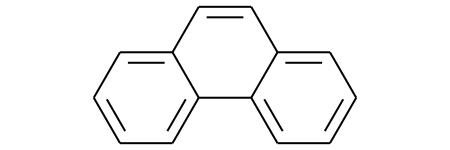

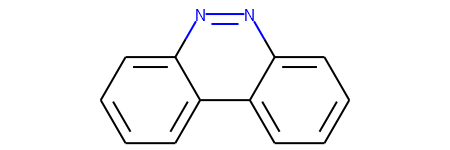

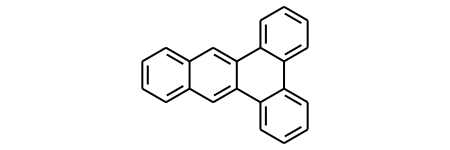

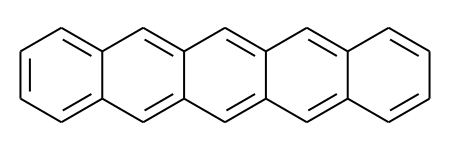

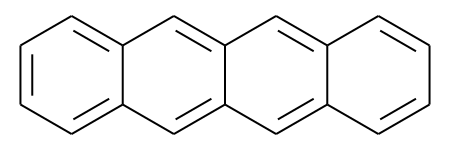

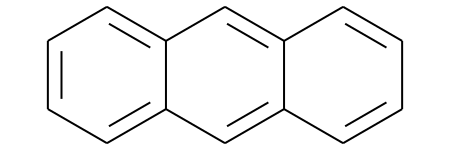

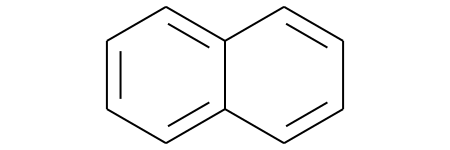

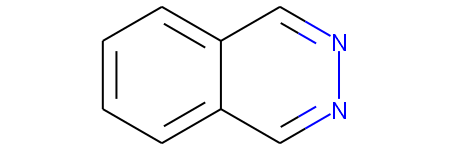

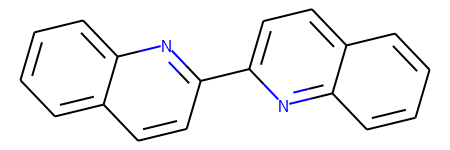

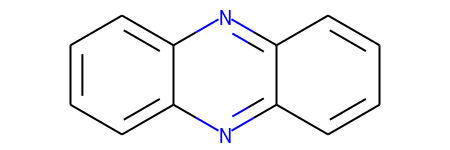

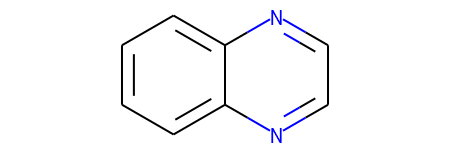

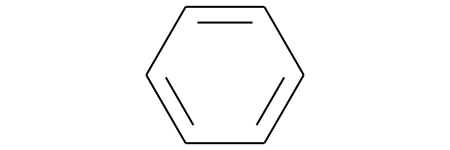

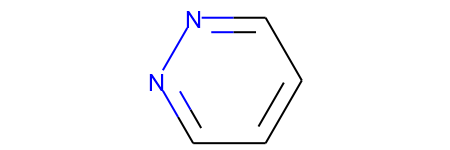

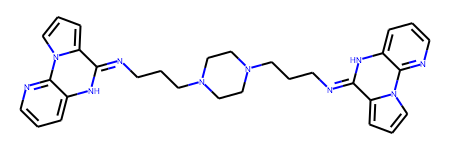

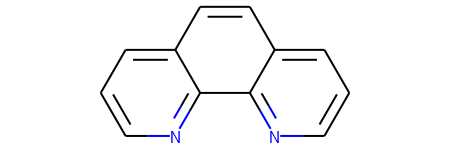

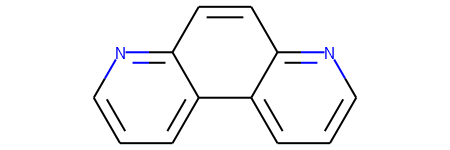

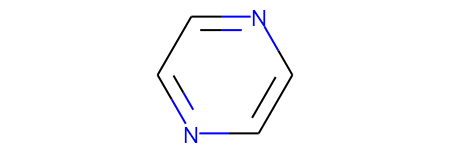

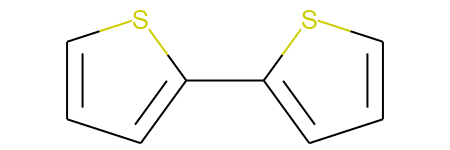

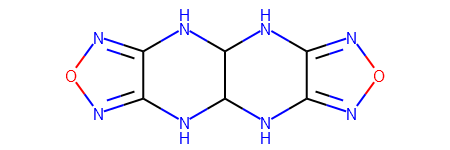

In [12]:
for smiles in symmetry_data.smiles:
    mol = Chem.MolFromSmiles(smiles)
    display(mol)

In [13]:
symmetry_data.describe()

,logP
count,401.000000
mean,2.844863
std,2.416140
min,-4.430000
25%,1.030000
50%,2.740000
75%,4.590000
max,9.050000


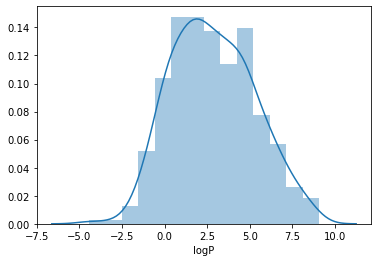

In [14]:
sns.distplot(symmetry_data.logP)

In [15]:
not_symmetry_data.describe()

,logP
count,13376.000000
mean,2.103019
std,1.843562
min,-4.650000
25%,0.890000
50%,2.010000
75%,3.210000
max,9.960000


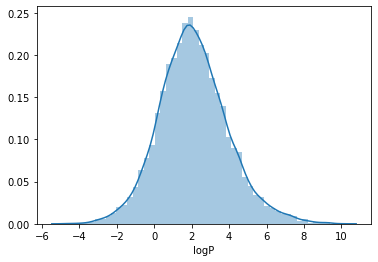

In [16]:
sns.distplot(not_symmetry_data.logP)

In [17]:
stats.ttest_ind(symmetry_data.logP, not_symmetry_data.logP)

Ttest_indResult(statistic=7.858398067772872, pvalue=4.178006710395826e-15)